**Import Libraries**

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


**Load Dataset**

In [52]:
path = "/kaggle/input/housing-prices-dataset/Housing.csv"
df = pd.read_csv(path)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Dataset Information**

In [53]:
df.shape


(545, 13)

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [55]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Check Missing Values**

In [56]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Encode Binary Categorical Variables**

In [57]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


**One-Hot Encoding**

In [58]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


**Feature Engineering**

In [59]:
df['area_per_bedroom'] = df['area'] / (df['bedrooms'] + 1)
df['bathroom_per_bedroom'] = df['bathrooms'] / (df['bedrooms'] + 1)
df['stories_bedrooms'] = df['stories'] * df['bedrooms']
df['area_bathrooms'] = df['area'] * df['bathrooms']

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_per_bedroom,bathroom_per_bedroom,stories_bedrooms,area_bathrooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False,1484.0,0.4,12,14840
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False,1792.0,0.8,16,35840
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False,2490.0,0.5,6,19920
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False,1500.0,0.4,8,15000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False,1484.0,0.2,8,7420


**Outlier Handling (Price Only)**

In [60]:
price_limit = df['price'].quantile(0.99)
df = df[df['price'] <= price_limit]

df.shape


(539, 18)

**Correlation Heatmap**

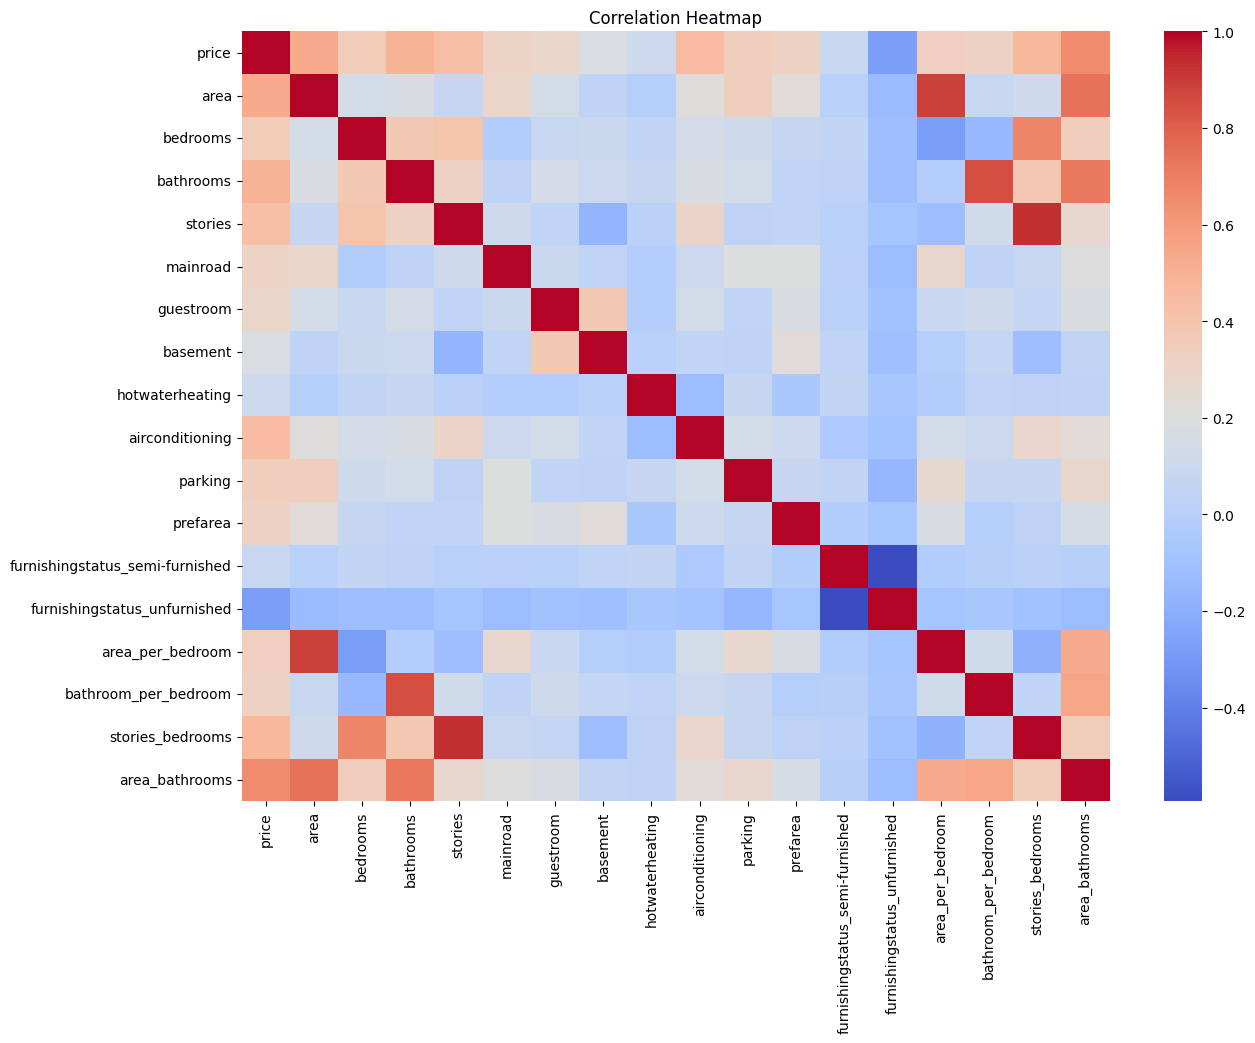

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


**Feature & Target Separation**

In [62]:
X = df.drop('price', axis=1)
y = df['price']

X.head(), y.head()


(     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
 6    8580         4          3        4         1          0         0   
 7   16200         5          3        2         1          0         0   
 8    8100         4          1        2         1          1         1   
 9    5750         3          2        4         1          1         0   
 10  13200         3          1        2         1          0         1   
 
     hotwaterheating  airconditioning  parking  prefarea  \
 6                 0                1        2         1   
 7                 0                0        0         0   
 8                 0                1        2         1   
 9                 0                1        1         1   
 10                0                1        2         1   
 
     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
 6                              True                         False   
 7                             False          

**Train-Test Split**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((431, 17), (108, 17))

**Linear Regression Model Training**

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


**Predictions**

In [65]:
y_pred = model.predict(X_test)

In [66]:
results = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

results.head(10)

,Actual Price,Predicted Price
0,2800000,3.623844e+06
1,6650000,6.833106e+06
2,3773000,4.629462e+06
3,6405000,6.910678e+06
4,3080000,3.389621e+06
5,6580000,6.725565e+06
6,2450000,3.208110e+06
7,3605000,3.259654e+06
8,6300000,6.147919e+06
9,3290000,2.878868e+06


In [67]:
y_pred = model.predict(X_test)
y_pred[:5]


array([3623844.46264936, 6833105.6452292 , 4629461.61281131,
       6910678.45726215, 3389620.70911517])

**Model Evaluation**

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 765595.9730610411
Mean Squared Error (MSE): 1059805901216.9508
R² Score: 0.7236316104479503


**Actual vs Predicted Plot**

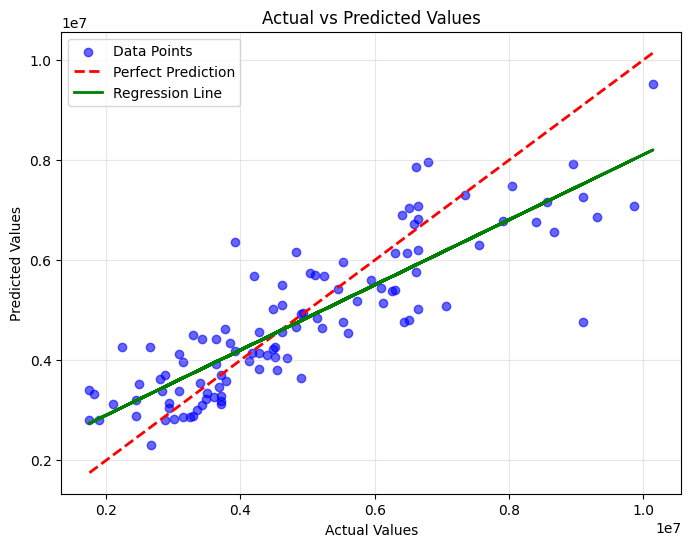

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Data Points')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "g-", lw=2, label='Regression Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()